## Problem Statement –: e-Commerce/Retail


### Title: Customer Feedback Analysis: Identifying Service Gaps and Improvement Opportunities
#### 📌 Context:

This project analyzes customer feedback data to uncover key patterns in satisfaction and dissatisfaction. The goal is to understand what customers value most (e.g., easy ordering, product quality, timely delivery) and identify recurring pain points (e.g., missing items, packaging issues, delivery behavior). By leveraging text analysis and categorization of feedback, the project provides actionable insights that can help businesses improve service quality, enhance customer experience, and boost retention.


* Project Published By ~ Ajay Borah .

### First, I performed data cleaning. After that, I solved all the questions related to this scenario, and the answers are provided after the cleaning process.

In [1]:
## Import Usefull Libraries For Data Analysis

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
## Load Your Dataset Using Pandas 

data = pd.read_csv(r"C:\Users\Lenovo\Downloads\Ecommerce_Delivery_Analytics_New.csv")
data.head(5)

,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
0,ORD000001,CUST2824,JioMart,19:29.5,30,Fruits & Vegetables,382,"Fast delivery, great service!",5,No,No
1,ORD000002,CUST1409,Blinkit,54:29.5,16,Dairy,279,Quick and reliable!,5,No,No
2,ORD000003,CUST5506,JioMart,21:29.5,25,Beverages,599,Items missing from order.,2,No,Yes
3,ORD000004,CUST5012,JioMart,19:29.5,42,Beverages,946,Items missing from order.,2,Yes,Yes
4,ORD000005,CUST4657,Blinkit,49:29.5,30,Beverages,334,"Fast delivery, great service!",5,No,No


In [7]:
## Cheak data types each Column and Data Structure 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Order ID                 100000 non-null  object
 1   Customer ID              100000 non-null  object
 2   Platform                 100000 non-null  object
 3   Order Date & Time        100000 non-null  object
 4   Delivery Time (Minutes)  100000 non-null  int64 
 5   Product Category         100000 non-null  object
 6   Order Value (INR)        100000 non-null  int64 
 7   Customer Feedback        100000 non-null  object
 8   Service Rating           100000 non-null  int64 
 9   Delivery Delay           100000 non-null  object
 10  Refund Requested         100000 non-null  object
dtypes: int64(3), object(8)
memory usage: 8.4+ MB


In [11]:
## Summurize Descraptive Statastic

data.describe()

,Delivery Time (Minutes),Order Value (INR),Service Rating
count,100000.000000,100000.000000,100000.000000
mean,29.536140,590.994400,3.240790
std,9.958933,417.409058,1.575962
min,5.000000,50.000000,1.000000
25%,23.000000,283.000000,2.000000
50%,30.000000,481.000000,3.000000
75%,36.000000,770.000000,5.000000
max,76.000000,2000.000000,5.000000


In [17]:
### List Down All The Columns Name

data.shape

(100000, 11)

In [10]:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Order ID                 100000 non-null  object
 1   Customer ID              100000 non-null  object
 2   Platform                 100000 non-null  object
 3   Order Date & Time        100000 non-null  object
 4   Delivery Time (Minutes)  100000 non-null  int64 
 5   Product Category         100000 non-null  object
 6   Order Value (INR)        100000 non-null  int64 
 7   Customer Feedback        100000 non-null  object
 8   Service Rating           100000 non-null  int64 
 9   Delivery Delay           100000 non-null  object
 10  Refund Requested         100000 non-null  object
dtypes: int64(3), object(8)
memory usage: 8.4+ MB


In [23]:
## We need to add a new column for better understanding because the Order Date & Time column is not properly defined with the correct datatype.

data["Order_Time"] = pd.to_datetime(data["Order Date & Time"], format="%H:%M.%S", errors="coerce").dt.time


In [13]:
## Missing Values In The Dataset 

data.isnull().sum()

Order ID                       0
Customer ID                    0
Platform                       0
Order Date & Time              0
Delivery Time (Minutes)        0
Product Category               0
Order Value (INR)              0
Customer Feedback              0
Service Rating                 0
Delivery Delay                 0
Refund Requested               0
Order_Time                 60089
dtype: int64

In [14]:
data.isnull().sum() /100

Order ID                     0.00
Customer ID                  0.00
Platform                     0.00
Order Date & Time            0.00
Delivery Time (Minutes)      0.00
Product Category             0.00
Order Value (INR)            0.00
Customer Feedback            0.00
Service Rating               0.00
Delivery Delay               0.00
Refund Requested             0.00
Order_Time                 600.89
dtype: float64

<Axes: ylabel='Count'>

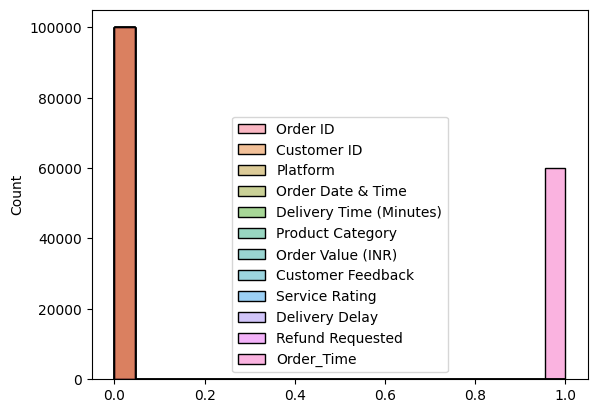

In [15]:
sns.histplot(data.isnull(),cbar=False)

In [ ]:
### Fill Missing Values help to mode 

data["Order_Time"].fillna(data["Order_Time"].mode()[0],inplace=True)
data.isnull().sum()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26576\1887780725.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Order_Time"].fillna(data["Order_Time"].mode()[0],inplace=True)


Order ID                   0
Customer ID                0
Platform                   0
Order Date & Time          0
Delivery Time (Minutes)    0
Product Category           0
Order Value (INR)          0
Customer Feedback          0
Service Rating             0
Delivery Delay             0
Refund Requested           0
Order_Time                 0
dtype: int64

## 1. Total Order Value Each Product Category



In [105]:
data.groupby("Product Category")["Order Value (INR)"].sum().sort_values(ascending=False)

Product Category
Personal Care          17395601
Grocery                14194055
Beverages               9086669
Dairy                   7610522
Fruits & Vegetables     6246517
Snacks                  4566076
Name: Order Value (INR), dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26576\3500016660.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data,x="Product Category",y="Order Value (INR)",palette="rainbow")


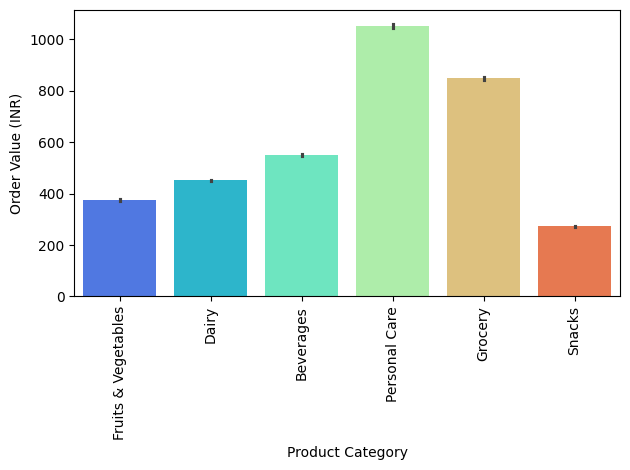

In [17]:
plt.Figure(figsize=(6,10))
sns.barplot(data=data,x="Product Category",y="Order Value (INR)",palette="rainbow")
plt.xticks(rotation = 90, fontsize =10 )
plt.tight_layout()



## Insight:

* Personal Care products generate the highest sales value in your dataset.

* Snacks contribute the least order value compared to other categories.

* Together, these categories form the major revenue drivers for the business.

## 2. Average Order Value by Product_Category


In [18]:
# Total Order Value Average

avg = data["Order Value (INR)"].mean()
avg

np.float64(590.9944)

In [19]:
## # Total Order Value Average Each Product Category 

data.groupby("Product Category")["Order Value (INR)"].mean()


Product Category
Beverages               549.508285
Dairy                   451.475470
Fruits & Vegetables     375.572210
Grocery                 848.064468
Personal Care          1052.174499
Snacks                  273.335887
Name: Order Value (INR), dtype: float64

* Among all product categories, Personal Care brings in the most money (highest order value).

* Snacks bring in the least money (lowest order value).

* All these categories combined make up the company’s main revenue sources.

## 3. Correlation between Delivery_Time and Rating


In [20]:
data.head(1)

,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested,Order_Time
0,ORD000001,CUST2824,JioMart,19:29.5,30,Fruits & Vegetables,382,"Fast delivery, great service!",5,No,No,19:29:05


In [21]:
Corr = data[["Delivery Time (Minutes)","Service Rating"]].corr()
Corr

,Delivery Time (Minutes),Service Rating
Delivery Time (Minutes),1.000000,0.000136
Service Rating,0.000136,1.000000


<Axes: >

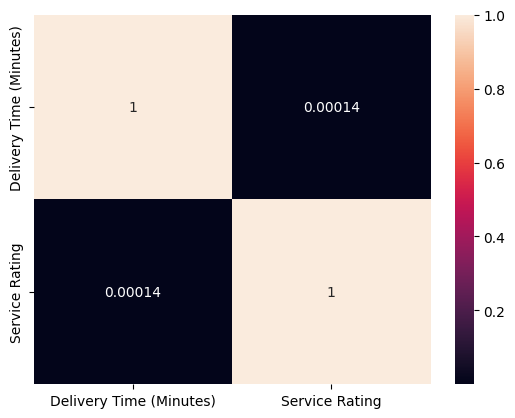

In [22]:
sns.heatmap(Corr,annot=True)

## Insights 

* Correlation = 0.000136 → This value is extremely close to 0.

* That means there is no meaningful relationship between how long delivery takes and the rating customers give for the service.

## 4. Which category received lowest average rating?


In [81]:
Lowest_rating = data.groupby("Product Category")["Service Rating"].mean().sort_values(ascending=True).head(1)
Lowest_rating

Product Category
Grocery    3.217841
Name: Service Rating, dtype: float64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23224\953294400.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=data,x="Product Category",y="Service Rating",kind="bar",estimator="mean",palette="rainbow")


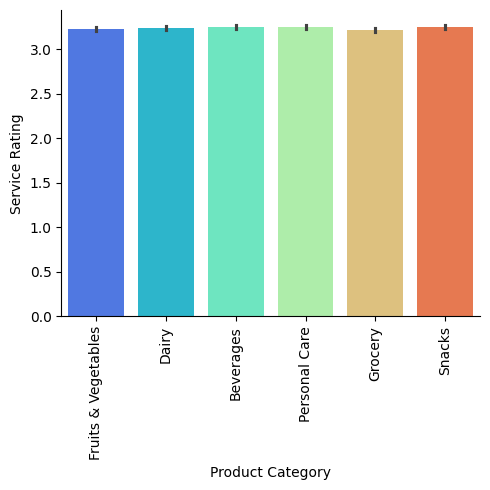

In [80]:

sns.catplot(data=data,x="Product Category",y="Service Rating",kind="bar",estimator="mean",palette="rainbow")
plt.xticks(rotation = 90, fontsize =10 )
plt.tight_layout()

* Snacks has the lowest service rating (2.9 out of 5).

## 5. Delivery delays mean and std deviation


In [94]:
mean_delay = data["Delivery Time (Minutes)"].mean()
std_delay = data["Delivery Time (Minutes)"].std()

print(f"Mean Delivery Delay {mean_delay} Minutes")
print(f"Std Dev of Delivery Delay: {std_delay} Minutes")


Mean Delivery Delay 29.53614 Minutes
Std Dev of Delivery Delay: 9.958932960104562 Minutes


## Insight 

* Most deliveries are delayed by 20 to 40 minutes 

##  --------------------------- Additional Analysis ---------------------------------

In [5]:
data

,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
0,ORD000001,CUST2824,JioMart,19:29.5,30,Fruits & Vegetables,382,"Fast delivery, great service!",5,No,No
1,ORD000002,CUST1409,Blinkit,54:29.5,16,Dairy,279,Quick and reliable!,5,No,No
2,ORD000003,CUST5506,JioMart,21:29.5,25,Beverages,599,Items missing from order.,2,No,Yes
3,ORD000004,CUST5012,JioMart,19:29.5,42,Beverages,946,Items missing from order.,2,Yes,Yes
4,ORD000005,CUST4657,Blinkit,49:29.5,30,Beverages,334,"Fast delivery, great service!",5,No,No
...,...,...,...,...,...,...,...,...,...,...,...
99995,ORD099996,CUST5324,JioMart,49:29.5,24,Dairy,289,Packaging could be better.,3,No,No
99996,ORD099997,CUST1677,JioMart,18:29.5,19,Snacks,322,Good quality products.,4,No,No
99997,ORD099998,CUST8198,JioMart,27:29.5,41,Dairy,135,"Fast delivery, great service!",5,Yes,No
99998,ORD099999,CUST9975,JioMart,14:29.5,31,Grocery,973,Quick and reliable!,5,No,No


In [14]:
rating_counts = data["Platform"].value_counts().reset_index()
print(rating_counts.head())

rating_counts = data["Platform"].value_counts().reset_index()
rating_counts.columns = ["Platform", "Count"]


           Platform  count
0  Swiggy Instamart  33449
1           Blinkit  33424
2           JioMart  33127


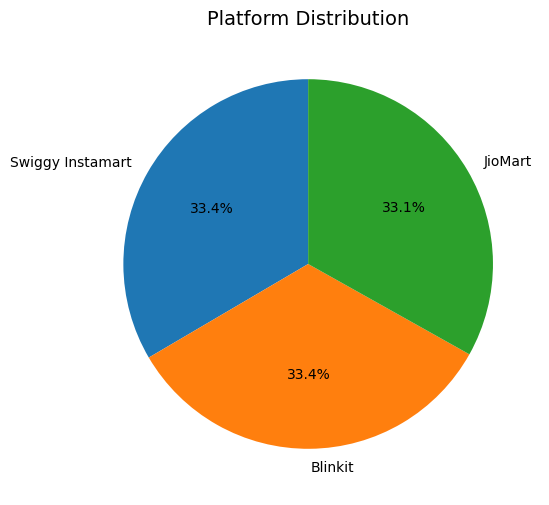

In [15]:
plt.figure(figsize=(6,6))
plt.pie(
    rating_counts["Count"], 
    labels=rating_counts["Platform"], 
    autopct='%1.1f%%', 
    startangle=90
)
plt.title("Platform Distribution", fontsize=14)
plt.show()


## Insight:

* The order counts are very close across all three platforms, suggesting healthy competition.

* Swiggy Instamart has a slight edge with the most orders, but the difference is not significant.

* This indicates that customers are fairly evenly distributed across these platforms.

In [ ]:
data["Service Rating"].value_counts()

Service Rating
5    38688
2    30552
1    15267
4     7789
3     7704
Name: count, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26576\3220484242.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x="Service Rating",palette="rainbow")


Text(0.5, 1.0, 'Service Rating Distribution ')

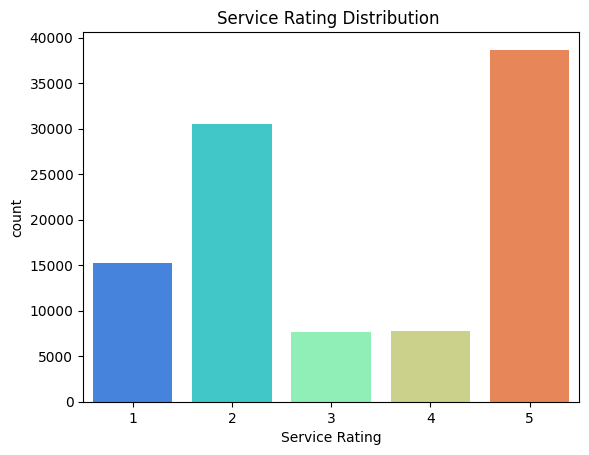

In [ ]:
sns.countplot(data=data,x="Service Rating",palette="rainbow")
plt.title("Service Rating Distribution ")

<Axes: xlabel='Platform', ylabel='percent'>

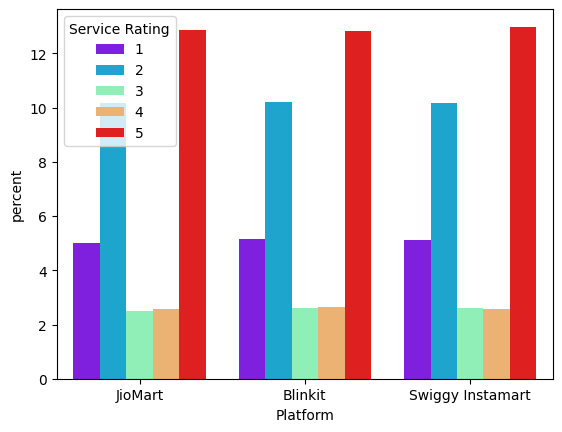

In [ ]:
## percentage of each Service Rating per Platform

sns.countplot(data=data,x="Platform",hue = "Service Rating",stat="percent",palette="rainbow")

In [4]:
data["Customer Feedback"].value_counts().sort_values(ascending=False)

Customer Feedback
Easy to order, loved it!                      7791
Good quality products.                        7789
Excellent experience!                         7784
Very satisfied with the service.              7740
Wrong item delivered.                         7738
Items missing from order.                     7737
Fast delivery, great service!                 7715
Packaging could be better.                    7704
Quick and reliable!                           7658
Delivery person was rude.                     7643
Very late delivery, not happy.                7592
Not fresh, disappointed.                      7580
Horrible experience, never ordering again.    7529
Name: count, dtype: int64

## Insights from Customer Feedback

* Most customers are happy with the service — they like easy ordering, good product quality, and quick delivery.

* Positive comments like “Easy to order, loved it!” and “Excellent experience!” are the most common.

* Customers also appreciate fast delivery and reliability.

* Some problems appear often: wrong or missing items, late delivery, poor packaging, rude delivery staff, and products not fresh.

## Conclusion

* Overall, customers are mostly satisfied.
But to improve further, the company should focus on reducing delivery issues, ensuring fresh products, improving packaging, and training delivery partners to behave politely.